# Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Import MNIST data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# Define Variables - Bias and Weights

In [3]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev=0.1)
    return( tf.Variable(initial) )

def bias_variable(shape):
    initial = tf.constant(0.1,shape = shape)
    return( tf.Variable(initial) )

# Define The different Models

# Single layer network

In [4]:
# Layer 1
x = tf.placeholder(tf.float32,shape=[None,784])
y = tf.placeholder(tf.float32,shape=[None,10])

w1 = weight_variable([784,10])
b1 = bias_variable([10])
h1 = tf.matmul(x,w1) + b1
y_ = tf.nn.softmax(h1)

cross_entropy = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_),1))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
init = tf.global_variables_initializer()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Step 0, 	 Accuracy: 0.10 , 	 Train Loss: 2.6020, 	 Test Loss: 2.5962 
Step 100, 	 Accuracy: 0.88 , 	 Train Loss: 0.4387, 	 Test Loss: 0.3790 
Step 200, 	 Accuracy: 0.92 , 	 Train Loss: 0.3190, 	 Test Loss: 0.3348 
Step 300, 	 Accuracy: 0.92 , 	 Train Loss: 0.3297, 	 Test Loss: 0.3162 
Step 400, 	 Accuracy: 0.89 , 	 Train Loss: 0.3277, 	 Test Loss: 0.3085 
Step 500, 	 Accuracy: 0.91 , 	 Train Loss: 0.2952, 	 Test Loss: 0.2980 
Step 600, 	 Accuracy: 0.89 , 	 Train Loss: 0.3921, 	 Test Loss: 0.2937 
Step 700, 	 Accuracy: 0.92 , 	 Train Loss: 0.2845, 	 Test Loss: 0.2923 
Step 800, 	 Accuracy: 0.92 , 	 Train Loss: 0.3088, 	 Test Loss: 0.2904 
Step 900, 	 Accuracy: 0.92 , 	 Train Loss: 0.2840, 	 Test Loss: 0.2857 
Step 1000, 	 Accuracy: 0.95 , 	 Train Loss: 0.2288, 	 Test Loss: 0.2839 
Step 1100, 	 Accuracy: 0.95 , 	 Train Loss: 0.2410, 	 Test Loss: 0.2815 
Step 1200, 	 Accuracy: 0.93 , 	 Train Loss: 0.3094, 	 Test Loss: 0.2806 
Step 1300, 	 Accuracy: 0.91 , 	 Train Loss: 0.2909, 	 Test Loss

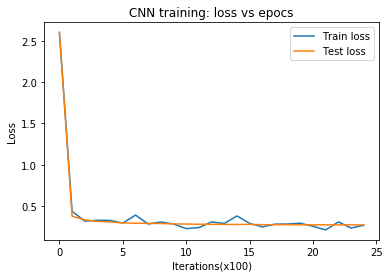

In [5]:
train_loss = []
test_loss = []

with tf.Session() as sess:
    sess.run(init)
    for i in range(2500):
        batch = mnist.train.next_batch(512)
        if( i%100 == 0):
            iter_loss,train_accuracy = sess.run([cross_entropy,accuracy],feed_dict={x:batch[0], y:batch[1]})
            train_loss.append(iter_loss)

            test_batch = mnist.test.next_batch(10000)
            iter_loss_test = cross_entropy.eval(feed_dict={x:test_batch[0],y:test_batch[1]})
            test_loss.append(iter_loss_test)

            print("Step %d, \t Accuracy: %.2f , \t Train Loss: %.4f, \t Test Loss: %.4f "%(i,train_accuracy,iter_loss,iter_loss_test))

        train_step.run(feed_dict={x:batch[0],y:batch[1]})
        
    y_prediction = y_.eval(feed_dict={x:batch[0],y:batch[1]})
    print("Test accuracy %g"%accuracy.eval(feed_dict={x:mnist.test.images,y:mnist.test.labels}))

legend1, = plt.plot(train_loss,label='Train loss')
legend2, = plt.plot(test_loss,label='Test loss')
plt.xlabel('Iterations(x100)')
plt.ylabel('Loss')
plt.title('CNN training: loss vs epocs')
plt.legend()
plt.show()


# 2 Layer network

In [71]:
# Layer 1
nHiddenNeuron = 100
x = tf.placeholder(tf.float32,shape=[None,784])
y = tf.placeholder(tf.float32,shape=[None,10])

w1 = weight_variable([784,nHiddenNeuron])
b1 = bias_variable([nHiddenNeuron])

w2 = weight_variable([nHiddenNeuron,10])
b2 = bias_variable([10])

h1 = tf.matmul(x,w1) + b1
z1 = tf.nn.sigmoid(h1)
h2 = tf.matmul(z1,w2) + b2
y_ = tf.nn.softmax(h2)

cross_entropy = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_),1))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
init = tf.initialize_all_variables()

Step 0, 	 Accuracy: 0.13 , 	 Train Loss: 2.3718, 	 Test Loss: 2.3650 
Step 100, 	 Accuracy: 0.85 , 	 Train Loss: 0.5653, 	 Test Loss: 0.5350 
Step 200, 	 Accuracy: 0.89 , 	 Train Loss: 0.4288, 	 Test Loss: 0.3821 
Step 300, 	 Accuracy: 0.90 , 	 Train Loss: 0.3322, 	 Test Loss: 0.3318 
Step 400, 	 Accuracy: 0.92 , 	 Train Loss: 0.3103, 	 Test Loss: 0.3085 
Step 500, 	 Accuracy: 0.93 , 	 Train Loss: 0.2734, 	 Test Loss: 0.2889 
Step 600, 	 Accuracy: 0.93 , 	 Train Loss: 0.2501, 	 Test Loss: 0.2754 
Step 700, 	 Accuracy: 0.93 , 	 Train Loss: 0.2531, 	 Test Loss: 0.2635 
Step 800, 	 Accuracy: 0.91 , 	 Train Loss: 0.2851, 	 Test Loss: 0.2538 
Step 900, 	 Accuracy: 0.90 , 	 Train Loss: 0.3530, 	 Test Loss: 0.2442 
Step 1000, 	 Accuracy: 0.93 , 	 Train Loss: 0.2146, 	 Test Loss: 0.2365 
Step 1100, 	 Accuracy: 0.93 , 	 Train Loss: 0.2282, 	 Test Loss: 0.2293 
Step 1200, 	 Accuracy: 0.95 , 	 Train Loss: 0.2076, 	 Test Loss: 0.2204 
Step 1300, 	 Accuracy: 0.93 , 	 Train Loss: 0.2275, 	 Test Loss

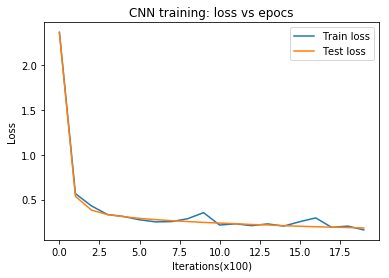

In [75]:
train_loss = []
test_loss = []

with tf.Session() as sess:
    sess.run(init)
    for i in range(2000):
        batch = mnist.train.next_batch(512)
        if( i%100 == 0):
            iter_loss,train_accuracy = sess.run([cross_entropy,accuracy],feed_dict={x:batch[0], y:batch[1]})
            train_loss.append(iter_loss)

            test_batch = mnist.test.next_batch(10000)
            iter_loss_test = cross_entropy.eval(feed_dict={x:test_batch[0],y:test_batch[1]})
            test_loss.append(iter_loss_test)

            print("Step %d, \t Accuracy: %.2f , \t Train Loss: %.4f, \t Test Loss: %.4f "%(i,train_accuracy,iter_loss,iter_loss_test))

        train_step.run(feed_dict={x:batch[0],y:batch[1]})
        
    y_prediction = y_.eval(feed_dict={x:batch[0],y:batch[1]})
    print("Test accuracy %g"%accuracy.eval(feed_dict={x:mnist.test.images,y:mnist.test.labels}))

legend1, = plt.plot(train_loss,label='Train loss')
legend2, = plt.plot(test_loss,label='Test loss')
plt.xlabel('Iterations(x100)')
plt.ylabel('Loss')
plt.title('CNN training: loss vs epocs')
plt.legend()
plt.show()


# Part 1.c Regularization with Momentum

In [84]:
# Layer 1
regCoeff = 0.00001
x = tf.placeholder(tf.float32,shape=[None,784])
y = tf.placeholder(tf.float32,shape=[None,10])


w1 = weight_variable([784,10])
b1 = bias_variable([10])
h1 = tf.matmul(x,w1) + b1
y_ = tf.nn.softmax(h1)

cross_entropy = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_),1)) + regCoeff * (tf.reduce_sum( tf.square(w1) ) + tf.reduce_sum( tf.square(b1)))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
init = tf.initialize_all_variables()

Step 0, 	 Accuracy: 0.08 , 	 Train Loss: 2.6506, 	 Test Loss: 2.6075 
Step 100, 	 Accuracy: 0.89 , 	 Train Loss: 0.3784, 	 Test Loss: 0.3802 
Step 200, 	 Accuracy: 0.91 , 	 Train Loss: 0.3259, 	 Test Loss: 0.3359 
Step 300, 	 Accuracy: 0.90 , 	 Train Loss: 0.3432, 	 Test Loss: 0.3159 
Step 400, 	 Accuracy: 0.93 , 	 Train Loss: 0.2607, 	 Test Loss: 0.3071 
Step 500, 	 Accuracy: 0.91 , 	 Train Loss: 0.3063, 	 Test Loss: 0.3001 
Step 600, 	 Accuracy: 0.90 , 	 Train Loss: 0.3225, 	 Test Loss: 0.2957 
Step 700, 	 Accuracy: 0.93 , 	 Train Loss: 0.2650, 	 Test Loss: 0.2918 
Step 800, 	 Accuracy: 0.93 , 	 Train Loss: 0.2760, 	 Test Loss: 0.2890 
Step 900, 	 Accuracy: 0.92 , 	 Train Loss: 0.2961, 	 Test Loss: 0.2859 
Step 1000, 	 Accuracy: 0.94 , 	 Train Loss: 0.2477, 	 Test Loss: 0.2843 
Step 1100, 	 Accuracy: 0.93 , 	 Train Loss: 0.2254, 	 Test Loss: 0.2837 
Step 1200, 	 Accuracy: 0.92 , 	 Train Loss: 0.2734, 	 Test Loss: 0.2826 
Step 1300, 	 Accuracy: 0.93 , 	 Train Loss: 0.2359, 	 Test Loss

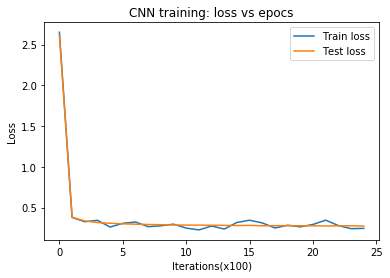

In [85]:
train_loss = []
test_loss = []

with tf.Session() as sess:
    sess.run(init)
    for i in range(2500):
        batch = mnist.train.next_batch(512)
        if( i%100 == 0):
            iter_loss,train_accuracy = sess.run([cross_entropy,accuracy],feed_dict={x:batch[0], y:batch[1]})
            train_loss.append(iter_loss)

            test_batch = mnist.test.next_batch(10000)
            iter_loss_test = cross_entropy.eval(feed_dict={x:test_batch[0],y:test_batch[1]})
            test_loss.append(iter_loss_test)

            print("Step %d, \t Accuracy: %.2f , \t Train Loss: %.4f, \t Test Loss: %.4f "%(i,train_accuracy,iter_loss,iter_loss_test))

        train_step.run(feed_dict={x:batch[0],y:batch[1]})
        
    y_prediction = y_.eval(feed_dict={x:batch[0],y:batch[1]})
    print("Test accuracy %g"%accuracy.eval(feed_dict={x:mnist.test.images,y:mnist.test.labels}))

legend1, = plt.plot(train_loss,label='Train loss')
legend2, = plt.plot(test_loss,label='Test loss')
plt.xlabel('Iterations(x100)')
plt.ylabel('Loss')
plt.title('CNN training: loss vs epocs')
plt.legend()
plt.show()
